<a href="https://colab.research.google.com/gist/Hwan26/101b800d898ad0deb0dfeeff35056c91/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
col = ["pregnant","Plasma_glucose","blood_pressure","skin_thickness","insulin","BMI","DiabetesPedigreeFunction","Age","outcome"]

In [31]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/pima-indians-diabetes.csv',header=None, names=col)

In [32]:
data.head()

,pregnant,Plasma_glucose,blood_pressure,skin_thickness,insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
#RFE

In [34]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import numpy as np


In [35]:
data.columns

Index(['pregnant', 'Plasma_glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'outcome'],
      dtype='object')

In [36]:
cols = ['pregnant', 'Plasma_glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[cols]
y = data['outcome']
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=2)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.707 (0.055)


In [37]:
rfe.fit(X_train,y_train)
rfe.ranking_

array([3, 1, 1, 4, 1, 1, 1, 2])

In [38]:
rfe.n_features_

5

In [39]:
np.array(cols)[rfe.support_]

array(['Plasma_glucose', 'blood_pressure', 'insulin', 'BMI',
       'DiabetesPedigreeFunction'], dtype='<U24')

In [40]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

>2 0.677 (0.042)
>3 0.684 (0.060)
>4 0.694 (0.049)
>5 0.704 (0.066)
>6 0.710 (0.055)
>7 0.703 (0.054)
>8 0.695 (0.058)
>9 0.701 (0.055)


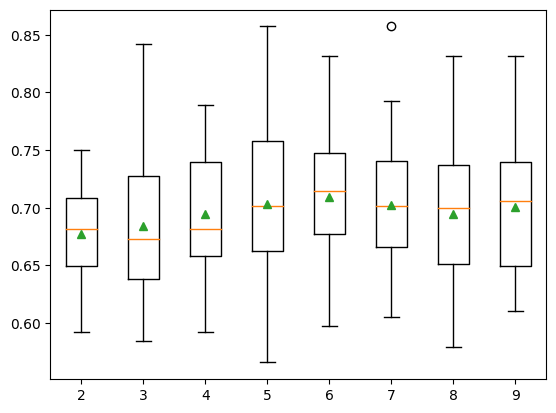

In [41]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()